In [265]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy

import numpy as np

In [266]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import anderson

from scipy.stats import boxcox
from scipy.special import inv_boxcox

from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

In [267]:
inspector_results = pd.read_csv("mda_dataset.csv")
l2_results = pd.read_csv("l2_analyzer_essay.csv")
taassc_results = pd.read_csv("result_taassc_essay.csv")
errors_data = pd.read_excel("dannye_novye.xlsx")


In [268]:
errors_data = errors_data.iloc[:-2]
errors_data = errors_data[["text_name", "errors"]]
errors_data.head(2)

,text_name,errors
0,exam2014/AAl_11_1.txt,1.0
1,exam2014/AAl_20_1.txt,1.0


In [269]:
def filter_num_words(text):
    if len(text.split()) >= 60:
        return True
    else:
        return False
    
inspector_results = inspector_results[inspector_results["type"] == 2]
del inspector_results["type"]
filter_arr = [filter_num_words(val) for val in inspector_results["text"].values]
inspector_results = inspector_results[filter_arr]

In [270]:
inspector_results.head(2)

,av_depth,max_depth,min_depth,num_acl,num_rel_cl,num_advcl,num_sent,num_tok,av_tok_before_root,av_len_sent,...,punct_mistakes_pp,punct_mistakes_because,punct_mistakes_but,punct_mistakes_compare,million_mistake,side_mistake,name,text,class,sum_punct
2,3.81,6,0,5,0,13,16,292,4.56,18.25,...,0,0,1,0,0,0,./data/exam/exam2017/DOv_2_2,More and more young people are stunding on the...,12,1
3,4.33,7,2,3,3,6,12,221,6.67,18.42,...,0,2,0,0,0,0,./data/exam/exam2017/EGe_61_2,﻿Nowdays we can notice the tendency that large...,13,2


In [271]:
def fix_name(x):
    if x[20] == "_":
        x = x[:20] + x[22:]
    return x[12:] + ".txt"

    
inspector_results["text_name"] = inspector_results["name"].apply(fix_name)
# inspector_results

In [272]:
full_data = inspector_results.merge(errors_data, on="text_name")

In [273]:
import os

for i, text in enumerate(full_data["text"].values):

    with open(f"text/{i}.txt", "w") as f:
        f.write(text)

In [274]:
taassc_results["FILENAME"] = taassc_results["filename"]
del taassc_results["filename"]
# taassc_results

In [275]:
def fix_name(x):
    if x[20] == "_":
        x = x[:20] + x[22:]
    return x[12:] + ".txt"
    
    
inspector_results["text_name"] = inspector_results["name"].apply(fix_name)
# inspector_results

In [276]:
inspector_results["FILENAME"] = [str(i) + ".txt" for i in list(range(len(inspector_results)))]


In [277]:
l2_results.head(2)

,Unnamed: 0,FILENAME,W,S,VP,C,T,DC,CT,CP,...,VP/T,C/T,DC/C,DC/T,T/S,CT/T,CP/T,CP/C,CN/T,CN/C
0,0,936.txt,281,15,36,27,16,11,9,4,...,2.2500,1.6875,0.4074,0.6875,1.0667,0.5625,0.2500,0.1481,3.0625,1.8148
1,1,937.txt,345,17,48,37,19,17,14,5,...,2.5263,1.9474,0.4595,0.8947,1.1176,0.7368,0.2632,0.1351,3.2632,1.6757


In [278]:
full_data = taassc_results.merge(inspector_results.merge(l2_results, on="FILENAME"), on="FILENAME") \
            .merge(errors_data, on="text_name")

In [279]:
full_data.head(2)

,nwords,av_nominal_deps,av_nsubj_deps,av_nsubj_pass_deps,av_agents_deps,av_dobj_deps,av_pobj_deps,av_iobj_deps,av_ncomp_deps,av_nominal_deps_NN,...,C/T,DC/C,DC/T,T/S,CT/T,CP/T,CP/C,CN/T,CN/C,errors
0,256,0.737500,0.685714,0.5,0.0,0.941176,0.692308,0.0,0.000000,0.783784,...,2.0000,0.5,1.0000,1.0000,0.8125,0.3750,0.1875,2.3125,1.1562,1.0
1,401,0.889764,0.770833,0.5,0.0,1.212121,0.731707,0.0,1.666667,1.018349,...,1.5517,0.4,0.6207,1.0741,0.5517,0.4828,0.3111,1.9655,1.2667,4.0


### Выделим только необходимые метрики из каждого инструмента:

In [280]:
s = "av_depth max_depth min_depth num_acl num_advcl num_sent num_tok av_tok_before_root av_len_sent num_cl num_tu num_compl_tu num_coord num_adj_noun num_part_noun num_noun_inf pos_sim_nei lemma_sim_nei pos_sim_all lemma_sim_all"
cols = [st for st in s.split()] + ["class"]

l2_must_have = ['MLS',
       'MLT', 'MLC', 'C/S', 'VP/T', 'C/T', 'DC/C', 'DC/T', 'T/S', 'CT/T',
       'CP/T', 'CP/C', 'CN/T', 'CN/C']

taassc_must_have = """acad_av_lemma_freq
acad_av_construction_freq
acad_av_lemma_construction_freq
acad_av_approx_collexeme
acad_av_faith_verb_cue
acad_av_faith_const_cue
acad_av_delta_p_verb_cue
acad_av_delta_p_const_cue
acad_av_lemma_freq_log
acad_av_construction_freq_log
acad_av_lemma_construction_freq_log
acad_av_lemma_freq_type
acad_av_construction_freq_type
acad_av_lemma_construction_freq_type
acad_av_approx_collexeme_type
acad_av_faith_verb_cue_type
acad_av_faith_const_cue_type
acad_av_delta_p_verb_cue_type
acad_av_delta_p_const_cue_type
acad_collexeme_ratio
acad_collexeme_ratio_type
acad_lemma_ttr
acad_construction_ttr
acad_lemma_construction_ttr
acad_lemma_attested
acad_construction_attested
acad_lemma_construction_attested
news_av_lemma_freq
news_av_construction_freq
news_av_lemma_construction_freq
news_av_approx_collexeme
news_av_faith_verb_cue
news_av_faith_const_cue
news_av_delta_p_verb_cue
news_av_delta_p_const_cue
news_av_lemma_freq_log
news_av_construction_freq_log
news_av_lemma_construction_freq_log
news_av_lemma_freq_type
news_av_construction_freq_type
news_av_lemma_construction_freq_type
news_av_approx_collexeme_type
news_av_faith_verb_cue_type
news_av_faith_const_cue_type
news_av_delta_p_verb_cue_type
news_av_delta_p_const_cue_type
news_collexeme_ratio
news_collexeme_ratio_type
news_lemma_ttr
news_construction_ttr
news_lemma_construction_ttr
news_lemma_attested
news_construction_attested
news_lemma_construction_attested
mag_av_lemma_freq
mag_av_construction_freq
mag_av_lemma_construction_freq
mag_av_approx_collexeme
mag_av_faith_verb_cue
mag_av_faith_const_cue
mag_av_delta_p_verb_cue
mag_av_delta_p_const_cue
mag_av_lemma_freq_log
mag_av_construction_freq_log
mag_av_lemma_construction_freq_log
mag_av_lemma_freq_type
mag_av_construction_freq_type
mag_av_lemma_construction_freq_type
mag_av_approx_collexeme_type
mag_av_faith_verb_cue_type
mag_av_faith_const_cue_type
mag_av_delta_p_verb_cue_type
mag_av_delta_p_const_cue_type
mag_collexeme_ratio
mag_collexeme_ratio_type
mag_lemma_ttr
mag_construction_ttr
mag_lemma_construction_ttr
mag_lemma_attested
mag_construction_attested
mag_lemma_construction_attested
fic_av_lemma_freq
fic_av_construction_freq
fic_av_lemma_construction_freq
fic_av_approx_collexeme
fic_av_faith_verb_cue
fic_av_faith_const_cue
fic_av_delta_p_verb_cue
fic_av_delta_p_const_cue
fic_av_lemma_freq_log
fic_av_construction_freq_log
fic_av_lemma_construction_freq_log
fic_av_lemma_freq_type
fic_av_construction_freq_type
fic_av_lemma_construction_freq_type
fic_av_approx_collexeme_type
fic_av_faith_verb_cue_type
fic_av_faith_const_cue_type
fic_av_delta_p_verb_cue_type
fic_av_delta_p_const_cue_type
fic_collexeme_ratio
fic_collexeme_ratio_type
fic_lemma_ttr
fic_construction_ttr
fic_lemma_construction_ttr
fic_lemma_attested
fic_construction_attested
fic_lemma_construction_attested
all_av_lemma_freq
all_av_construction_freq
all_av_lemma_construction_freq
all_av_approx_collexeme
all_av_faith_verb_cue
all_av_faith_const_cue
all_av_delta_p_verb_cue
all_av_delta_p_const_cue
all_av_lemma_freq_log
all_av_construction_freq_log
all_av_lemma_construction_freq_log
all_av_lemma_freq_type
all_av_construction_freq_type
all_av_lemma_construction_freq_type
all_av_approx_collexeme_type
all_av_faith_verb_cue_type
all_av_faith_const_cue_type
all_av_delta_p_verb_cue_type
all_av_delta_p_const_cue_type
all_collexeme_ratio
all_collexeme_ratio_type
all_lemma_ttr
all_construction_ttr
all_lemma_construction_ttr
all_lemma_attested
all_construction_attested
all_lemma_construction_attested
all_av_lemma_freq_stdev
all_av_construction_freq_stdev
all_av_lemma_construction_freq_stdev
all_av_approx_collexeme_stdev
all_av_faith_verb_cue_stdev
all_av_faith_const_cue_stdev
all_av_delta_p_verb_cue_stdev
all_av_delta_p_const_cue_stdev
acad_av_lemma_freq_stdev
acad_av_construction_freq_stdev
acad_av_lemma_construction_freq_stdev
acad_av_approx_collexeme_stdev
acad_av_faith_verb_cue_stdev
acad_av_faith_const_cue_stdev
acad_av_delta_p_verb_cue_stdev
acad_av_delta_p_const_cue_stdev
news_av_lemma_freq_stdev
news_av_construction_freq_stdev
news_av_lemma_construction_freq_stdev
news_av_approx_collexeme_stdev
news_av_faith_verb_cue_stdev
news_av_faith_const_cue_stdev
news_av_delta_p_verb_cue_stdev
news_av_delta_p_const_cue_stdev
mag_av_lemma_freq_stdev
mag_av_construction_freq_stdev
mag_av_lemma_construction_freq_stdev
mag_av_approx_collexeme_stdev
mag_av_faith_verb_cue_stdev
mag_av_faith_const_cue_stdev
mag_av_delta_p_verb_cue_stdev
mag_av_delta_p_const_cue_stdev
fic_av_lemma_freq_stdev
fic_av_construction_freq_stdev
fic_av_lemma_construction_freq_stdev
fic_av_approx_collexeme_stdev
fic_av_faith_verb_cue_stdev
fic_av_faith_const_cue_stdev
fic_av_delta_p_verb_cue_stdev
fic_av_delta_p_const_cue_stdev
all_av_lemma_freq_log_stdev
all_av_construction_freq_log_stdev
all_av_lemma_construction_freq_log_stdev
acad_av_lemma_freq_log_stdev
acad_av_construction_freq_log_stdev
acad_av_lemma_construction_freq_log_stdev
news_av_lemma_freq_log_stdev
news_av_construction_freq_log_stdev
news_av_lemma_construction_freq_log_stdev
mag_av_lemma_freq_log_stdev
mag_av_construction_freq_log_stdev
mag_av_lemma_construction_freq_log_stdev
fic_av_lemma_freq_log_stdev
fic_av_construction_freq_log_stdev
fic_av_lemma_construction_freq_log_stdev"""

taassc_must_have = taassc_must_have.split("\n")

must_have_cols = cols + l2_must_have + list(taassc_must_have) + ["errors"]
len(must_have_cols)

226

In [281]:
for col_name in full_data.columns:
    if col_name not in must_have_cols:
        del full_data[col_name]

### Посмотрим, сколько эссе содержится в каждом классе

In [282]:
print(set(full_data["class"].values))
[(i, len(full_data[full_data["class"] == i])) for i in 
     set(full_data["class"].values)]

{3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16}


[(3, 1),
 (6, 2),
 (7, 1),
 (8, 4),
 (9, 11),
 (10, 34),
 (11, 89),
 (12, 222),
 (13, 106),
 (14, 43),
 (15, 5),
 (16, 1)]

In [283]:
print(set(full_data["errors"].values))
[(i, len(full_data[full_data["errors"] == i])) for i in 
     set(full_data["errors"].values)]

{1.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 16.0}


[(1.0, 290),
 (4.0, 86),
 (5.0, 45),
 (6.0, 35),
 (7.0, 23),
 (8.0, 15),
 (9.0, 9),
 (10.0, 4),
 (11.0, 4),
 (12.0, 2),
 (13.0, 1),
 (14.0, 3),
 (16.0, 2)]

### Отбросим группы, в которых слишком мало данных

In [284]:
full_data_error = full_data.copy()

In [285]:
full_data_error = full_data_error[full_data_error["errors"] <= 9]

In [286]:
full_data = full_data[full_data["class"] != 3]
full_data = full_data[full_data["class"] != 4]
full_data = full_data[full_data["class"] != 5]
full_data = full_data[full_data["class"] != 6]
full_data = full_data[full_data["class"] != 7]
full_data = full_data[full_data["class"] != 8]
full_data = full_data[full_data["class"] != 15]
full_data = full_data[full_data["class"] != 16]
full_data = full_data[full_data["class"] != 17]

In [287]:
full_data_norm = full_data.copy()
full_data_corr = full_data.copy()

### Применим функции преобразования и посмотрим, распределения каких метрик можно привести к нормальному:

In [288]:
from scipy.stats import yeojohnson


transformations = ["orig", "log", "sqrt", "1/x", "yeojohnson", "boxcox"]
count = 0
normal_cols = ["class"]


def get_p_value(func, col, double_ret=False):
    try:
        if double_ret:
            transform, _ = func(col)
        else:
            transform = func(col)
        if len(transform) != len(col):
            return 0.0
        stat, p = shapiro(transform)
        
#         print(p)
    except:
        return 0.0
#     print(p)
    if p > 0.9:
        p = 0.0
#     print("p-norm:", p)
    return p
        


for col_name in full_data_norm.columns:
    col = full_data_norm[col_name].values
    if type(col[0]) != str:
        shapiro_p_val = []
        
        stat, p = shapiro(col)
        if p == 1.0:
        
            p = 0.0
        shapiro_p_val.append(p)

        shapiro_p_val.append(get_p_value(np.log, col))

        shapiro_p_val.append(get_p_value(np.sqrt, col))

        shapiro_p_val.append(get_p_value(np.reciprocal, col))

        shapiro_p_val.append(get_p_value(yeojohnson, col, True))

        shapiro_p_val.append(get_p_value(boxcox, col, True))

#         print(shapiro_p_val)
        if np.max(shapiro_p_val) > 0.05:
#             print("p", np.max(shapiro_p_val))
#             print(shapiro_p_val)
            normal_cols.append(col_name)
            argmax = np.argmax(shapiro_p_val)
            print(col_name, transformations[argmax], round(np.max(shapiro_p_val), 3))
            if transformations[argmax] == "orig":
                full_data_norm[col_name] = col
            elif transformations[argmax] == "log":
                full_data_norm[col_name] = np.log(col)
            elif transformations[argmax] == "sqrt":
                full_data_norm[col_name] = np.sqrt(col)
            elif transformations[argmax] == "1/x":
                full_data_norm[col_name] = np.reciprocal(col)
            elif transformations[argmax] == "yeojohnson":
#                 print(len(full_data_norm[col_name].values), len(col), len(yeojohnson(col)))
                full_data_norm[col_name] = yeojohnson(col)[0]
            elif transformations[argmax] == "boxcox":
                full_data_norm[col_name] = boxcox(col)[0]

av_depth yeojohnson 0.104
av_tok_before_root yeojohnson 0.434
av_len_sent yeojohnson 0.508
num_adj_noun yeojohnson 0.061
pos_sim_nei yeojohnson 0.442
lemma_sim_nei yeojohnson 0.227


/home/koteuka/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:1673: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "
/home/koteuka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/home/koteuka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in reciprocal
  
/home/koteuka/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in reciprocal
  


MLS log 0.134
MLT 1/x 0.099
MLC boxcox 0.866
C/S yeojohnson 0.09
VP/T yeojohnson 0.881
C/T yeojohnson 0.339
DC/C yeojohnson 0.418
DC/T yeojohnson 0.202
CT/T yeojohnson 0.452
CP/T yeojohnson 0.517
CP/C yeojohnson 0.662
CN/T yeojohnson 0.862
CN/C yeojohnson 0.711


In [289]:
print(normal_cols)

for col_name in full_data_norm.columns:
    if col_name not in normal_cols:
        del full_data_norm[col_name]

['class', 'av_depth', 'av_tok_before_root', 'av_len_sent', 'num_adj_noun', 'pos_sim_nei', 'lemma_sim_nei', 'MLS', 'MLT', 'MLC', 'C/S', 'VP/T', 'C/T', 'DC/C', 'DC/T', 'CT/T', 'CP/T', 'CP/C', 'CN/T', 'CN/C']


### Применим тест Левена и отберём подходящие значения

In [290]:
from scipy.stats import bartlett
from scipy.stats import levene


class_val = set(full_data_norm["class"].values)
normal_cols = ["class"]

for col_name in full_data_norm.columns:
    col = full_data_norm[col_name].values
    if type(col[0]) != str:
        arr = []
        for class_v in class_val:
            arr.append(full_data_norm[full_data_norm["class"] == class_v][col_name])
#         print([len(i) for i in arr])
        # Bartlett's test in Python with SciPy:
#         stat, p = bartlett(ctrl, trt1, trt2)
        stat, p = levene(*arr)
        # Get the results:
        print(round(stat, 3), "\t", round(p, 4), "\t", col_name)
        if p > 0.05:
            normal_cols.append(col_name)

2.341 	 0.0406 	 av_depth
0.29 	 0.9188 	 av_tok_before_root
2.01 	 0.0758 	 av_len_sent
1.153 	 0.3315 	 num_adj_noun
2.528 	 0.0283 	 pos_sim_nei
2.763 	 0.0179 	 lemma_sim_nei
nan 	 nan 	 class
0.739 	 0.5942 	 MLS
1.966 	 0.0822 	 MLT
0.904 	 0.4779 	 MLC
0.723 	 0.6066 	 C/S
0.494 	 0.7807 	 VP/T
0.432 	 0.8264 	 C/T
0.911 	 0.4734 	 DC/C
0.675 	 0.6425 	 DC/T
1.245 	 0.2869 	 CT/T
0.798 	 0.5515 	 CP/T
0.359 	 0.8763 	 CP/C
2.383 	 0.0375 	 CN/T
1.708 	 0.1312 	 CN/C


/home/koteuka/anaconda3/lib/python3.7/site-packages/scipy/stats/morestats.py:2369: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom


In [291]:
print(normal_cols)

for col_name in full_data_norm.columns:
    if col_name not in normal_cols:
        del full_data_norm[col_name]

['class', 'av_tok_before_root', 'av_len_sent', 'num_adj_noun', 'MLS', 'MLT', 'MLC', 'C/S', 'VP/T', 'C/T', 'DC/C', 'DC/T', 'CT/T', 'CP/T', 'CP/C', 'CN/C']


### Удалим мультиколлинеарные переменные, то есть для тех независимых переменных, у которых абсолютное значение коллинеарности по Спирмену больше, чем 0.7 возьмём ту метрику, которая показывает максимальный коэффициент корреляции с зависимой переменной

##### Сначала удалим коррелирующие переменные для зависимого столбца 'class':

In [308]:
filtered_data = full_data_corr.copy()
del filtered_data["errors"]

In [309]:
col_to_del = set()
# class_col_index = [i for i, j in enumerate(filtered_data.columns) if j == "class"][0]
# corr_mat = filtered_data.corr("spearman").values

break_flag = True
prev_len_val = 0

while True:
    class_col_index = [i for i, j in enumerate(filtered_data.columns) if j == "class"][0]
    corr_mat = filtered_data.corr("spearman").values
    col_to_del = set()
    
    for i, col_name in enumerate(filtered_data.columns):
        buff_arr = []
        for j, col_name_2 in enumerate(filtered_data.columns):
            if i == j:
                continue
            if corr_mat[i][j] > 0.7:
                buff_arr.append((j, col_name_2))
        if len(buff_arr) > 0:
            buff_arr.append((i, col_name))
            break
    
    if len(buff_arr) == 0:
        break
    max_val = 0.0
    max_col = None
    for j, col in buff_arr:
        if corr_mat[class_col_index][j] > max_val:
            max_val = corr_mat[class_col_index][j]
            max_col = col
    col_to_del = col_to_del.union(set([i for _, i in buff_arr]))
#     print(col_to_del)
    col_to_del -= set([max_col])
    
    for col in col_to_del:
        del filtered_data[col]

In [310]:
filtered_data.columns

Index(['max_depth', 'min_depth', 'num_acl', 'num_advcl', 'num_sent', 'num_tok',
       'av_tok_before_root', 'num_tu', 'num_coord', 'num_adj_noun',
       'num_part_noun', 'num_noun_inf', 'class', 'MLT', 'MLC', 'C/T', 'T/S',
       'CP/T'],
      dtype='object')

### Рассмотрим матрицу корреляции Спирмена, чтобы убедиться в отсутствии мультиколлинеарности между независимыми переменными

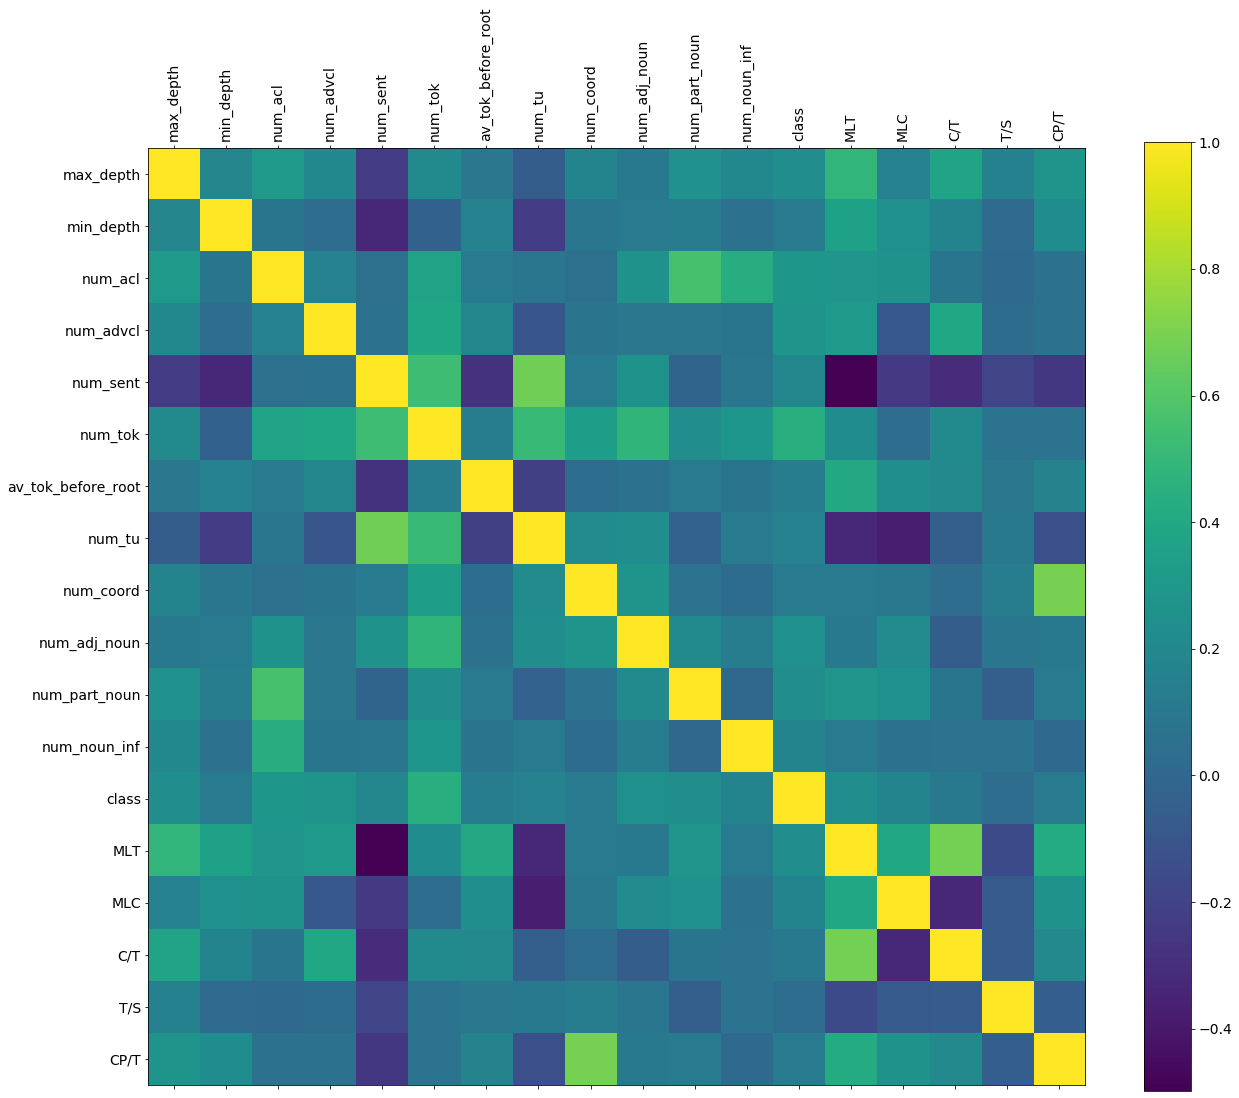

In [311]:
f = plt.figure(figsize=(21, 17))
plt.matshow(filtered_data.corr("spearman"), fignum=f.number)
plt.xticks(range(filtered_data.select_dtypes(['number']).shape[1]),
           filtered_data.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(filtered_data.select_dtypes(['number']).shape[1]),
           filtered_data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title(' ', fontsize=16);

### Отсортируем значения коэффициента корреляции с зависимой переменной для оценки:

In [312]:
class_col_index = [i for i, j in enumerate(filtered_data.columns) if j == "class"][0]


corr_mat = filtered_data.corr("spearman").values[class_col_index, :]
corr_mat_kend = filtered_data.corr("kendall").values[class_col_index, :]
res_dict = {}
for i, colname in enumerate(filtered_data.corr("spearman").columns):
    res_dict[colname] = (round(corr_mat[i], 3), round(corr_mat_kend[i], 3))

In [313]:
print("\t (Spearman, Kendal)\n")

for col, val in sorted(res_dict.items(), key=lambda x: -np.abs(x[1][0])):
    print(col,":  ", val)

	 (Spearman, Kendal)

class :   (1.0, 1.0)
num_tok :   (0.439, 0.342)
num_acl :   (0.295, 0.235)
num_advcl :   (0.275, 0.215)
num_adj_noun :   (0.257, 0.199)
num_part_noun :   (0.245, 0.2)
max_depth :   (0.235, 0.19)
MLT :   (0.234, 0.175)
num_sent :   (0.19, 0.151)
num_noun_inf :   (0.177, 0.144)
MLC :   (0.177, 0.133)
num_tu :   (0.164, 0.126)
av_tok_before_root :   (0.137, 0.103)
num_coord :   (0.125, 0.098)
min_depth :   (0.124, 0.104)
CP/T :   (0.117, 0.087)
C/T :   (0.108, 0.082)
T/S :   (0.035, 0.027)


In [314]:
from scipy import stats

print("Colname:  Spearman p-value:   Kendall p-value:")
for col in filtered_data.columns:
    val = filtered_data[col].values
    print(col, "      ", round(stats.spearmanr(val, filtered_data["class"].values)[1], 4), "      ", 
    round(stats.kendalltau(val, filtered_data["class"].values)[1], 4))

Colname:  Spearman p-value:   Kendall p-value:
max_depth        0.0        0.0
min_depth        0.0052        0.0055
num_acl        0.0        0.0
num_advcl        0.0        0.0
num_sent        0.0        0.0
num_tok        0.0        0.0
av_tok_before_root        0.0021        0.002
num_tu        0.0002        0.0002
num_coord        0.0049        0.0044
num_adj_noun        0.0        0.0
num_part_noun        0.0        0.0
num_noun_inf        0.0001        0.0001
class        0.0        0.0
MLT        0.0        0.0
MLC        0.0001        0.0001
C/T        0.0148        0.0144
T/S        0.4317        0.424
CP/T        0.0084        0.0091


### Рассмотрим график зависимости среднего значения первых в рейтинге метрик от оценки:

Text(0.5, 1.0, 'num_adj_noun')

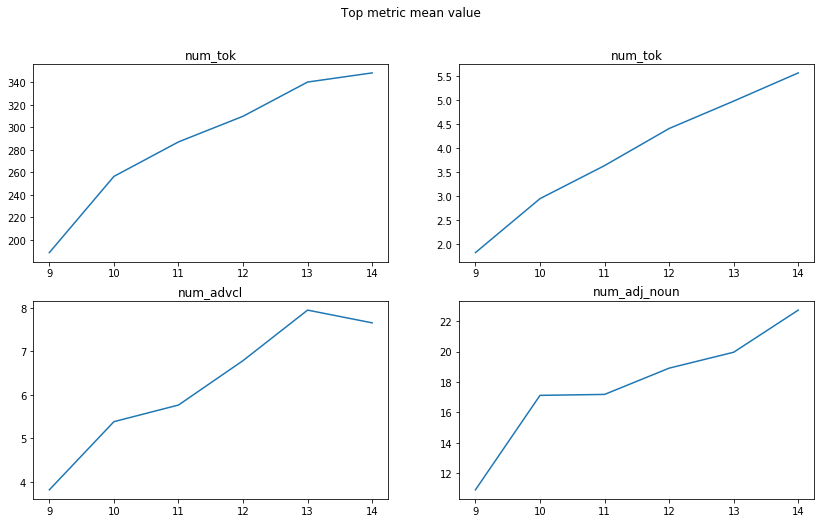

In [299]:
from matplotlib.pyplot import figure


fig, axs = plt.subplots(2, 2, figsize=(14, 8))

# fig.figure(figsize=(8, 6), dpi=80)
fig.suptitle('Top metric mean value')

axs[0][0].plot(list(set(filtered_data["class"].values)),
            filtered_data.groupby('class')["num_tok"].mean().values)
axs[0, 0].set_title("num_tok")

axs[0][1].plot(list(set(filtered_data["class"].values)),
            filtered_data.groupby('class')["num_acl"].mean().values)
axs[0, 1].set_title("num_tok")

axs[1][0].plot(list(set(filtered_data["class"].values)),
            filtered_data.groupby('class')["num_advcl"].mean().values)
axs[1, 0].set_title("num_advcl")

axs[1][1].plot(list(set(filtered_data["class"].values)),
            filtered_data.groupby('class')["num_adj_noun"].mean().values)
axs[1, 1].set_title("num_adj_noun")


### Сделаем те же самые шаги для выявления корреляции с количеством синтаксических ошибок:

In [300]:
filtered_data = full_data_error.copy()
del filtered_data["class"]

In [301]:
while True:
    class_col_index = [i for i, j in enumerate(filtered_data.columns) if j == "errors"][0]
    corr_mat = filtered_data.corr("spearman").values
    col_to_del = set()
    
    for i, col_name in enumerate(filtered_data.columns):
        buff_arr = []
        for j, col_name_2 in enumerate(filtered_data.columns):
            if i == j:
                continue
            if corr_mat[i][j] > 0.7:
                buff_arr.append((j, col_name_2))
        if len(buff_arr) > 0:
            buff_arr.append((i, col_name))
            break
    
    if len(buff_arr) == 0:
        break
    max_val = 0.0
    max_col = None
    for j, col in buff_arr:
        if corr_mat[class_col_index][j] > max_val:
            max_val = corr_mat[class_col_index][j]
            max_col = col
    col_to_del = col_to_del.union(set([i for _, i in buff_arr]))
#     print(col_to_del)
    col_to_del -= set([max_col])
    
    for col in col_to_del:
        del filtered_data[col]

### Посмотрим матрицу корреляции

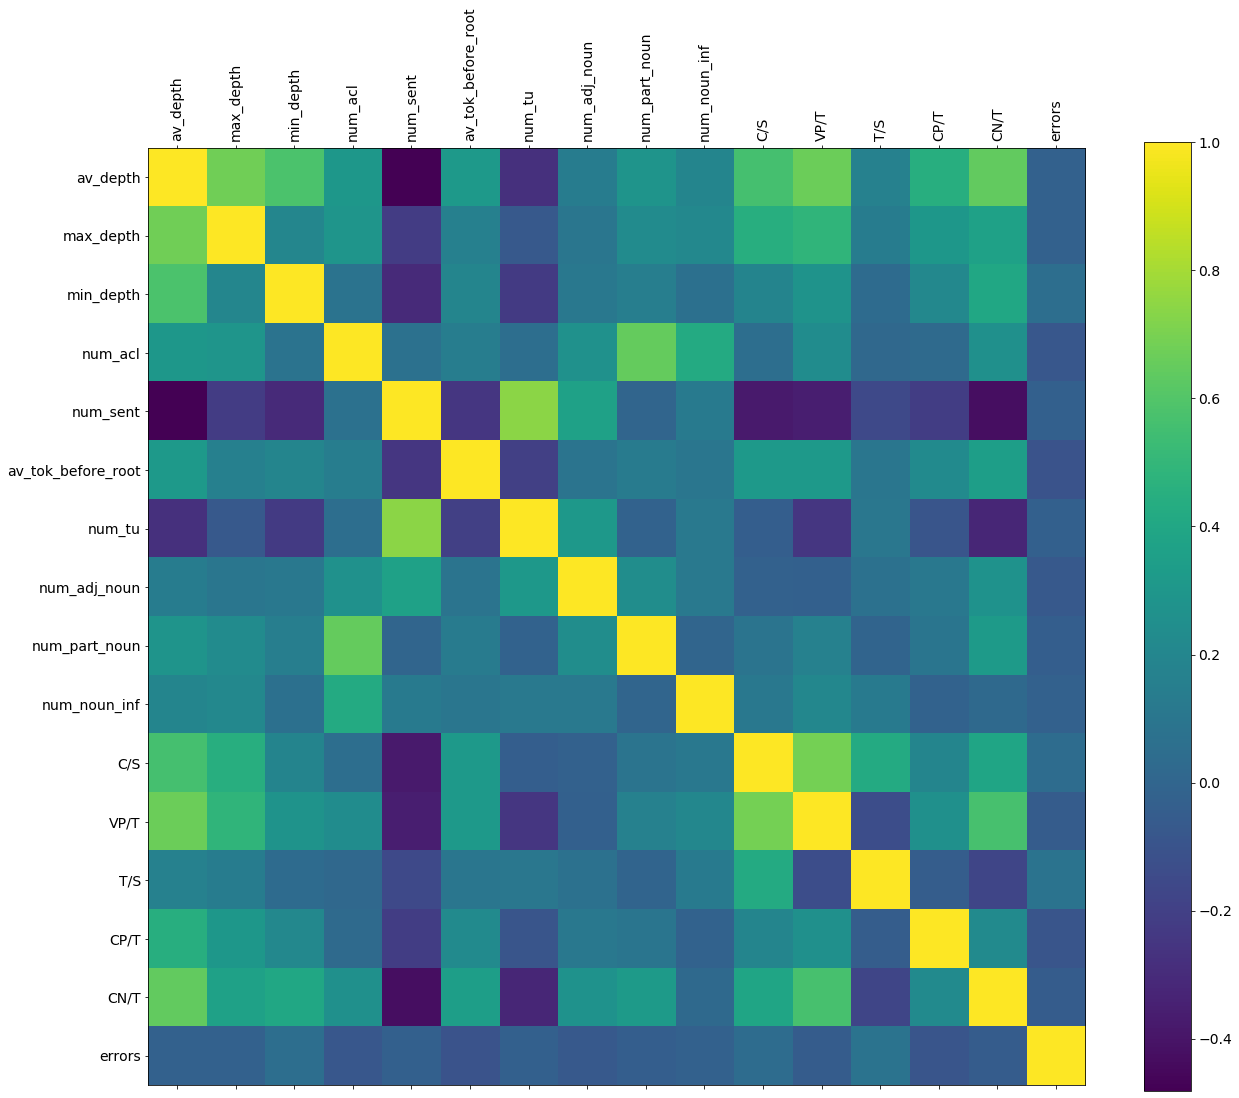

In [302]:
f = plt.figure(figsize=(21, 17))
plt.matshow(filtered_data.corr(), fignum=f.number)
plt.xticks(range(filtered_data.select_dtypes(['number']).shape[1]),
           filtered_data.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(filtered_data.select_dtypes(['number']).shape[1]),
           filtered_data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title(' ', fontsize=16);

### Отсортируем значения коэффициента корреляции с зависимой переменной для количества синтаксических ошибок:

In [303]:
class_col_index = [i for i, j in enumerate(filtered_data.columns) if j == "errors"][0]


corr_mat = filtered_data.corr("spearman").values[class_col_index, :]
corr_mat_kend = filtered_data.corr("kendall").values[class_col_index, :]
res_dict = {}
for i, colname in enumerate(filtered_data.corr("spearman").columns):
    res_dict[colname] = (round(corr_mat[i], 3), round(corr_mat_kend[i], 3))

In [304]:
print("\t\t(Spearman, Kendal)\n")

for col, val in sorted(res_dict.items(), key=lambda x: -np.abs(x[1][0])):
    print(col,"            ", val[0], "          ", val[1])

		(Spearman, Kendal)

errors              1.0            1.0
av_tok_before_root              -0.103            -0.078
CP/T              -0.1            -0.079
num_acl              -0.094            -0.075
num_adj_noun              -0.084            -0.064
num_part_noun              -0.069            -0.057
CN/T              -0.064            -0.049
min_depth              0.052            0.045
T/S              0.049            0.037
VP/T              -0.044            -0.033
num_sent              -0.043            -0.034
C/S              0.043            0.033
num_tu              -0.028            -0.021
num_noun_inf              -0.025            -0.02
max_depth              0.012            0.01
av_depth              0.002            0.002


In [305]:
from scipy import stats

print("Colname:  Spearman p-value:   Kendall p-value:")
for col in filtered_data.columns:
    val = filtered_data[col].values
    print(col, "      ", round(stats.spearmanr(val, filtered_data["errors"].values)[1], 4), "      ", 
    round(stats.kendalltau(val, filtered_data["errors"].values)[1], 4))

Colname:  Spearman p-value:   Kendall p-value:
av_depth        0.9558        0.9489
max_depth        0.7841        0.7823
min_depth        0.242        0.2404
num_acl        0.0356        0.0343
num_sent        0.3408        0.34
av_tok_before_root        0.0215        0.0209
num_tu        0.5299        0.5394
num_adj_noun        0.0592        0.0638
num_part_noun        0.1244        0.1229
num_noun_inf        0.5789        0.5783
C/S        0.3312        0.3246
VP/T        0.3225        0.3252
T/S        0.277        0.2834
CP/T        0.0244        0.0208
CN/T        0.1541        0.1496
errors        0.0        0.0
